# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', 'GrLivArea', '1stFlrSF', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

## Continuous Features

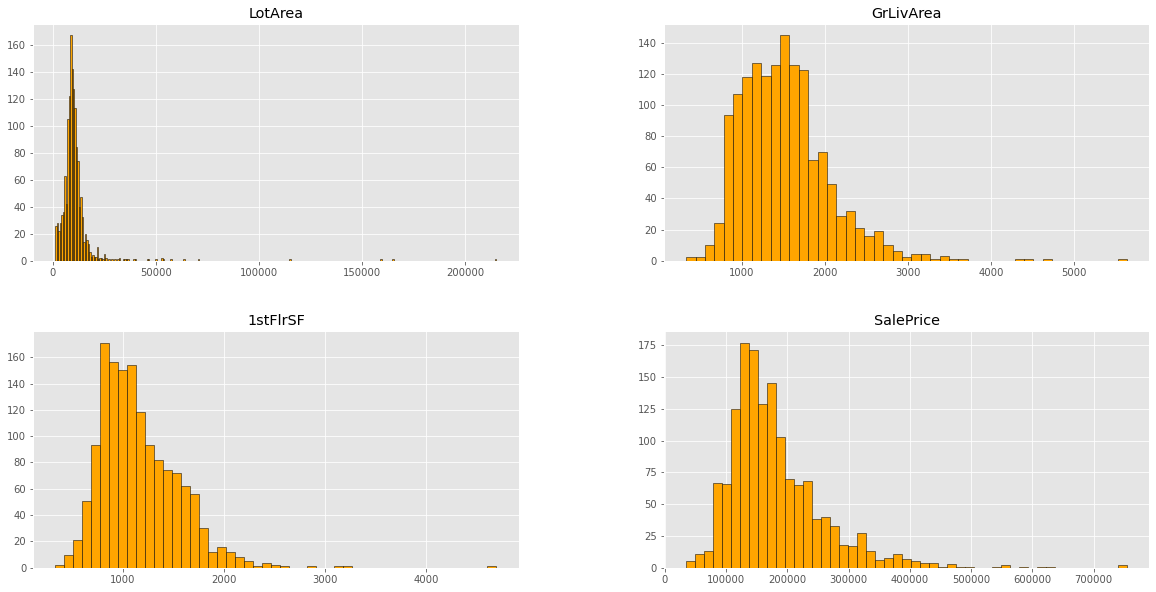

In [3]:
# Visualize continuous Features using Histograms
ames[continuous].hist(figsize=(20,10), bins='auto', color='orange', edgecolor='black');

### Log Transform

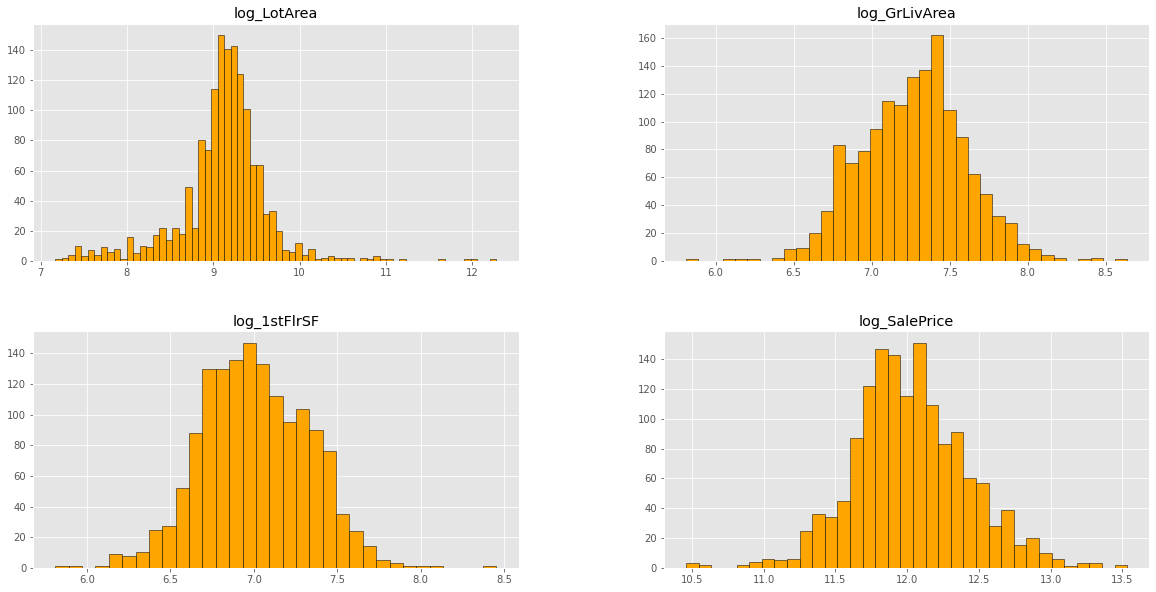

In [4]:
# LotArea, GrLivArea and 1stFlrSF seem to be right skewed
# --> apply log transformation on these features to see if they'll look more normal

# create a log transform function that takes in 2 arguments:
# - 1st arg: list of columns to be transformed
# - 2nd arg: dataframe
def log_transform(cols, dt):
    dt_log = pd.DataFrame([])
    for c in cols:
        dt_log[f'log_{c}'] = np.log(dt[c])
        
    return dt_log

# apply log_transform on the 3 selected features 
log_ames_cont = log_transform(continuous, ames[continuous])
log_ames_cont.hist(figsize=(20,10), bins='auto', color='orange', edgecolor='black');

In [5]:
# Histograms of these features after log transformation do look more normally distributed

### Standardization

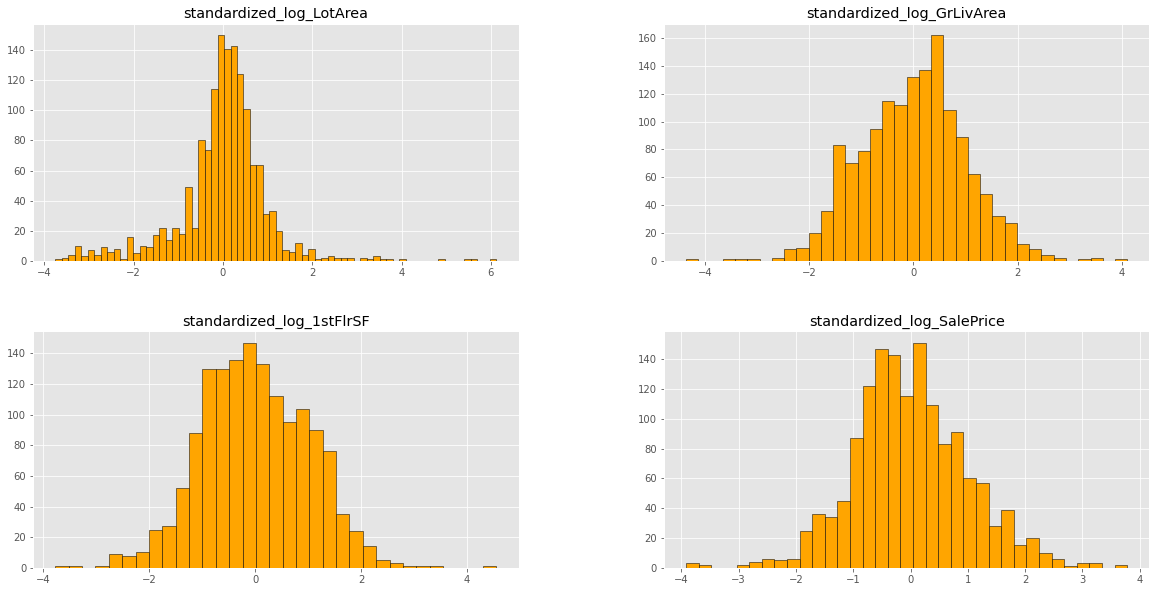

In [6]:
# Now that we have more normally distrbuted input data, we can apply standardization on them
# to change the mean to 0 and standard deviation to 1

# Create a standardization function that takes in 2 arguments:
# - 1st arg: list of columns to be standardized
# - 2nd arg: dataframe
def standardize(cols, dt):
    dt_standard = pd.DataFrame([])
    for c in cols:
        dt_standard[f'standardized_{c}'] = (dt[c] - np.mean(dt[c])) / np.std(dt[c])
    return dt_standard

# Apply standardize on log_ames_cont
final_cont = standardize(log_ames_cont.columns, log_ames_cont)
final_cont.hist(figsize=(20,10), bins='auto', color='orange', edgecolor='black');

## Categorical Features

In [7]:
# One-hot encoding for categorical data using pd.get_dummies
# final_cat = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

In [8]:
# One Hot Encoding using sklearn
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
ohe.fit(ames[categoricals])
cat_labels = ohe.transform(ames[categoricals]).todense()

final_cat = pd.DataFrame(cat_labels, columns=ohe.get_feature_names())
final_cat.head()

,x0_2fmCon,x0_Duplex,x0_Twnhs,x0_TwnhsE,x1_Fa,x1_Gd,x1_TA,x2_CWD,x2_Con,x2_ConLD,...,x5_NoRidge,x5_NridgHt,x5_OldTown,x5_SWISU,x5_Sawyer,x5_SawyerW,x5_Somerst,x5_StoneBr,x5_Timber,x5_Veenker
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
ohe.categories_

[array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'],
       dtype=object),
 array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object)]

## Combine Categorical and Continuous Features

In [10]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([final_cont, final_cat], axis=1)
preprocessed.head()

,standardized_log_LotArea,standardized_log_GrLivArea,standardized_log_1stFlrSF,standardized_log_SalePrice,x0_2fmCon,x0_Duplex,x0_Twnhs,x0_TwnhsE,x1_Fa,x1_Gd,...,x5_NoRidge,x5_NridgHt,x5_OldTown,x5_SWISU,x5_Sawyer,x5_SawyerW,x5_Somerst,x5_StoneBr,x5_Timber,x5_Veenker
0,-0.133231,0.529260,-0.803570,0.560068,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.113442,-0.381846,0.418585,0.212764,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.420061,0.659675,-0.576560,0.734046,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.103347,0.541511,-0.439287,-0.437382,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.878409,1.282191,0.112267,1.014651,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# move standardized_log_SalePrice to the first column
cols = list(preprocessed.columns)
cols = [cols[3]] + cols[:3] + cols[4:]
preprocessed = preprocessed[cols]
preprocessed.head()

,standardized_log_SalePrice,standardized_log_LotArea,standardized_log_GrLivArea,standardized_log_1stFlrSF,x0_2fmCon,x0_Duplex,x0_Twnhs,x0_TwnhsE,x1_Fa,x1_Gd,...,x5_NoRidge,x5_NridgHt,x5_OldTown,x5_SWISU,x5_Sawyer,x5_SawyerW,x5_Somerst,x5_StoneBr,x5_Timber,x5_Veenker
0,0.560068,-0.133231,0.529260,-0.803570,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.212764,0.113442,-0.381846,0.418585,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.734046,0.420061,0.659675,-0.576560,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.437382,0.103347,0.541511,-0.439287,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.014651,0.878409,1.282191,0.112267,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Run a linear model with SalePrice as the target variable in statsmodels

In [12]:
# Your code here
outcome = 'standardized_log_SalePrice'
predictors = preprocessed.drop('standardized_log_SalePrice', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     standardized_log_SalePrice   R-squared:                       0.839
Model:                                    OLS   Adj. R-squared:                  0.834
Method:                         Least Squares   F-statistic:                     156.5
Date:                        Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                                16:21:07   Log-Likelihood:                -738.64
No. Observations:                        1460   AIC:                             1573.
Df Residuals:                            1412   BIC:                             1827.
Df Model:                                  47                                         
Covariance Type:                    nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.1317      0.263     -0.500      0.617      -0.648       0.385
standardized_log_LotArea       0.1033      0.019      5.475      0.000       0.066       0.140
standardized_log_GrLivArea     0.3768      0.016     24.114      0.000       0.346       0.407
standardized_log_1stFlrSF      0.1371      0.016      8.584      0.000       0.106       0.168
x0_2fmCon                     -0.1715      0.079     -2.173      0.030      -0.326      -0.017
x0_Duplex                     -0.4205      0.062     -6.813      0.000      -0.542      -0.299
x0_Twnhs                      -0.1404      0.093     -1.513      0.130      -0.322       0.042
x0_TwnhsE                     -0.0512      0.060     -0.858      0.391      -0.168       0.066
x1_Fa                         -1.0002      0.088    -11.315      0.000      -1.174      -0.827
x1_Gd                         -0.3822      0.050     -7.613      0.000      -0.481      -0.284
x1_TA                         -0.6695      0.055    -12.111      0.000      -0.778      -0.561
x2_CWD                         0.2286      0.215      1.061      0.289      -0.194       0.651
x2_Con                         0.5863      0.304      1.927      0.054      -0.010       1.183
x2_ConLD                       0.3152      0.155      2.029      0.043       0.010       0.620
x2_ConLI                       0.0331      0.195      0.169      0.865      -0.350       0.416
x2_ConLw                       0.0161      0.196      0.082      0.935      -0.368       0.400
x2_New                         0.3000      0.079      3.803      0.000       0.145       0.455
x2_Oth                         0.1179      0.246      0.480      0.631      -0.364       0.599
x2_WD                          0.1749      0.065      2.676      0.008       0.047       0.303
x3_FV                          1.0670      0.193      5.526      0.000       0.688       1.446
x3_RH                          0.8771      0.194      4.512      0.000       0.496       1.258
x3_RL                          0.9964      0.162      6.151      0.000       0.679       1.314
x3_RM                          1.1027      0.152      7.264      0.000       0.805       1.400
x4_Pave                       -0.2132      0.180     -1.182      0.237      -0.567       0.141
x5_Blueste                     0.0530      0.318      0.167      0.868      -0.571       0.677
x5_BrDale                     -0.4629      0.171     -2.711      0.007      -0.798      -0.128
x5_BrkSide                    -0.6500      0.137     -4.735      0.000      -0.919      -0.381
x5_ClearCr                    -0.2103      0.144     -1.456      0.146      -0.494       0.073
x5_CollgCr                    -0.0761      0.119  

## Run the same model in scikit-learn

In [13]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels

from sklearn.linear_model import LinearRegression
y = preprocessed['standardized_log_SalePrice']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression()

In [14]:
# Convert Scikit Learn results into a pandas Series
sk_results = np.insert(linreg.coef_, 0, linreg.intercept_, axis=0)
sk_s = pd.Series(sk_results, index=model.params.index)

In [15]:
# Concatenate Statsmodels & Scikit-Learn results into 1 dataframe for comparison
final_results = pd.concat([model.params, sk_s], axis=1)
final_results.columns = ['Statsmodels', 'Scikit-Learn']
final_results

,Statsmodels,Scikit-Learn
Intercept,-0.131742,-0.131742
standardized_log_LotArea,0.103272,0.103272
standardized_log_GrLivArea,0.376821,0.376821
standardized_log_1stFlrSF,0.137129,0.137129
x0_2fmCon,-0.171521,-0.171521
x0_Duplex,-0.420483,-0.420483
x0_Twnhs,-0.140389,-0.140389
x0_TwnhsE,-0.051219,-0.051219
x1_Fa,-1.000203,-1.000203
x1_Gd,-0.382153,-0.382153


In [16]:
# The results are the same!

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

**Converting test data - Method 1:** using sklearn's OneHotEncoder above

In [17]:
test_data = {'LotArea': [14977], 'GrLivArea': [1976], '1stFlrSF': [1976],'BldgType': ['1Fam'], 'KitchenQual': ['Gd'],
             'SaleType': ['New'], 'MSZoning': ['RL'], 'Street': ['Pave'], 'Neighborhood': ['NridgHt']}

test_df = pd.DataFrame(test_data)
test_df

,LotArea,GrLivArea,1stFlrSF,BldgType,KitchenQual,SaleType,MSZoning,Street,Neighborhood
0,14977,1976,1976,1Fam,Gd,New,RL,Pave,NridgHt


In [18]:
# Transform continuous test data
continuous = ['LotArea', 'GrLivArea', '1stFlrSF']
final_cont_test = {'standardized_log_LotArea': [], 'standardized_log_GrLivArea': [], 'standardized_log_1stFlrSF': []}

for c in continuous:
    logged = np.log(test_df[c])
    stdized = (logged - np.mean(log_ames_cont[f'log_{c}'])) / np.std(log_ames_cont[f'log_{c}'])
    final_cont_test[f'standardized_log_{c}'] = stdized
    
test_cont = pd.DataFrame(final_cont_test)

In [19]:
# Transform categorical data using one-hot encoding class above
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']
cat_test = ohe.transform(test_df[categoricals]).todense()
test_cat = pd.DataFrame(cat_test, columns=ohe.get_feature_names())

In [20]:
# Concat everything together to create 1 final test data df
final_test = pd.concat([test_cont, test_cat], axis=1)
final_test

,standardized_log_LotArea,standardized_log_GrLivArea,standardized_log_1stFlrSF,x0_2fmCon,x0_Duplex,x0_Twnhs,x0_TwnhsE,x1_Fa,x1_Gd,x1_TA,...,x5_NoRidge,x5_NridgHt,x5_OldTown,x5_SWISU,x5_Sawyer,x5_SawyerW,x5_Somerst,x5_StoneBr,x5_Timber,x5_Veenker
0,0.973248,0.962869,1.830257,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Predict standardized log transformed price of house using above linreg model that's already fitted
y_hat = linreg.predict(final_test)

# Convert predicted y_hat value to original unit/currency
def convert_saleprice(y_hat):
    return np.exp(y_hat * np.std(log_ames_cont.log_SalePrice) + np.mean(log_ames_cont.log_SalePrice))

# Apply convert_saleprice on y_hat
convert_saleprice(y_hat)

array([321728.49636656])

**Converting test data - Method 2:**
- Creating a (1 x 48) vector of zeros
- Travel down the array using variable 'cursor' and edit value as needed

In [22]:
# Create test data dictionary
test_house = {'LotArea': 14977, 'GrLivArea': 1976, '1stFlrSF': 1976,'BldgType': '1Fam', 'KitchenQual': 'Gd',
             'SaleType': 'New', 'MSZoning': 'RL', 'Street': 'Pave', 'Neighborhood': 'NridgHt'}

# initialize transformed vector
test_house_transformed = np.zeros(48)

# first value corresponds with the intercept
test_house_transformed[0] = 1

# Get the standardized values of continuous variables after log transformation
continuous = ['LotArea', 'GrLivArea', '1stFlrSF']

# start the cursor position at 1
cursor = 1
for c in continuous:
    logged = np.log(test_house[c])
    stdized = (logged - np.mean(log_ames_cont[f'log_{c}'])) / np.std(log_ames_cont[f'log_{c}'])
    test_house_transformed[cursor] = stdized
    cursor += 1

# Convert categorical values 
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']
cursor = 4
for idx, c in enumerate(categoricals):
    # find the index of test_house[c] in one hot encoding categories list
    i = list(ohe.categories_[idx]).index(test_house[c])
    
    # if it's NOT the first value the list (since we dropped the first value)
    if i != 0:
        # update the corresponding value in test_house_transformed to 1
        test_house_transformed[cursor + i - 1] = 1
        
    # increment idx by the length of ames[c].unique() - 1
    cursor += (len(ohe.categories_[idx]) - 1)

test_house_transformed

array([1.        , 0.97324786, 0.96286942, 1.83025654, 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [23]:
# Predict using dot product
y_hat2 = np.dot(model.params.values, np.transpose(test_house_transformed))

convert_saleprice(y_hat2)

321728.4963665604

The 2 methods produce the same result.

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!